In [11]:
#%matplotlib widget
import tops.dynamic as dps
import tops.solvers as dps_sol
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import time
from IPython.display import clear_output

# Load model
# import tops.ps_models.k2a as model_data
# import ps_models.n44 as model_data
import tops.ps_models.ieee39 as model_data
model = model_data.load()
t_0 = time.time()
ps = dps.PowerSystemModel(model=model)
ps.pf_max_it = 100
ps.init_dyn_sim()

Standard model: lines, Line
Standard model: loads, Load
Standard model: gov, TGOV1
Standard model: avr, SEXS
Standard model: pss, STAB1
Standard model: trafos, Trafo
Standard model: gen, GEN


In [12]:
# Verify that initialization was successful
assert max(ps.ode_fun(0.0, ps.x0)) < 1e-6

# Declare simulation variables
t_end = 5
x0 = ps.x0.copy()
x0[ps.gen['GEN'].state_idx_global['angle'][0]] += 0.1
sol = dps_sol.ModifiedEulerDAE(ps.state_derivatives, ps.solve_algebraic, 0, x0, t_end, max_step=10e-3)
t = 0
result_dict = defaultdict(list)

In [13]:

# Enter simulation loop
while t < t_end:
    clear_output(wait=True)
    print(t)

    # Simulate next step
    result = sol.step()
    x = sol.y
    t = sol.t

    # Store result
    result_dict['Global', 't'].append(sol.t)
    [result_dict[tuple(desc)].append(state) for desc, state in zip(ps.state_desc, x)]

print('Simulation completed in {:.2f} seconds.'.format(time.time() - t_0))

# Convert result to pandas Dataframe
index = pd.MultiIndex.from_tuples(result_dict)
result = pd.DataFrame(result_dict, columns=index)

4.999999999999938
Simulation completed in 4.05 seconds.


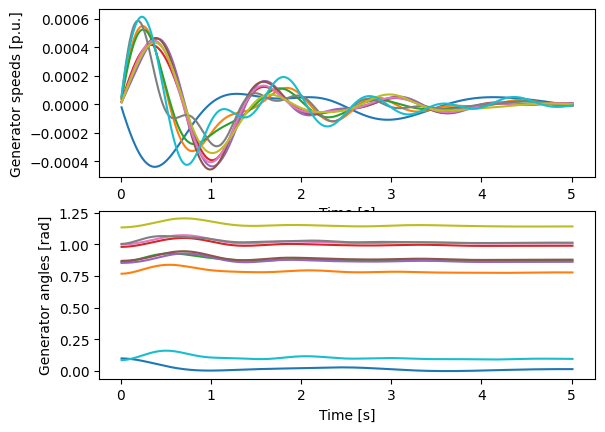

In [19]:

# Plot results
fig, ax = plt.subplots(2)
ax[0].plot(result[('Global', 't')], result.xs(key='speed', axis='columns', level=1))
ax[1].plot(result[('Global', 't')], result.xs(key='angle', axis='columns', level=1))
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Generator speeds [p.u.]')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Generator angles [rad]')
plt.show()

